# Carga de datos y programación básica en R

## Importar Datos

[conjunto de datos](https://felipe-calvo.github.io/r-101/resources/data.zip)

Una vez descargados los archivos de datos, vamos a ubicarlos al interior de una carpeta llamada data que a su vez crearemos dentro del directorio de nuestro proyecto.

### Paquetes para importar datos

- [tidyverse](https://www.tidyverse.org/): Conjunto de funciones para limpiar,
  procesar, organizar y mostrar datos
- [readxl](https://readxl.tidyverse.org/): leer archivos de excel
- [haven](https://haven.tidyverse.org/): Leer archivos spss
- [googlesheets](https://github.com/jennybc/googlesheets)Leer archivos de google
- [RMySQL](https://github.com/r-dbi/RMySQL): Leer archivos sql

In [1]:
# Instalamos los paquetes - LOCALMENTE
# install.packages("tidyverse")
# install.packages("readxl")
# install.packages("haven")
# install.packages("googlesheets")
# install.packages("RMySQL")

# Cargamos los paquetes
library("tidyverse")
library("readxl")
library("haven")
library("googlesheets")
library("RMySQL")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: DBI



### Archivos de texto plano (.txt)

[Codificación de caracteres](https://www.w3.org/International/articles/definitions-characters/index.es). Unicode es un set de caracteres universal, es
decir, un estándar en el que se definen todos los caracteres necesarios para la
escritura de la mayoría de los idiomas hablados en la actualidad que se usan en la
computadora.

In [2]:
read_delim(
  file = "data/Boston_Housing.txt",
  delim = "|", 
  locale=locale(decimal_mark = ",")
  ) -> boston_housing_txt

read.table(
  file =  "data/Boston_Housing.txt",
  sep =  "|",
  header = TRUE,
  dec = ",",
  fileEncoding = "UTF-8"
  ) -> boston_housing_txt

str(boston_housing_txt)

Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),
  RAD = col_double(),
  TAX = col_double(),
  PTRATIO = col_double(),
  B = col_double(),
  LSTAT = col_double(),
  MEDV = col_double()
)



'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### Archivo de valores separados por comas (.csv)

In [3]:
read_csv2(
  file = "data/Boston_Housing.csv"
) -> boston_housing_csv

str(boston_housing_csv)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),
  RAD = col_double(),
  TAX = col_double(),
  PTRATIO = col_double(),
  B = col_double(),
  LSTAT = col_double(),
  MEDV = col_double()
)



tibble [506 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   CRIM = col

### Archivos de Excel (.xls .xlsx)

In [4]:
## library("readxl")
read_excel(
  path = "data/Boston_Housing.xls"
) -> boston_housing_xls

str(boston_housing_xls)

read_xlsx(
  path = "data/Boston_Housing.xlsx", 
  sheet="Data"
) -> boston_housing_xlsx
str(boston_housing_xlsx)

tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : nu

### Archivos de STATA (.dta)

In [5]:
## library("haven")
read_dta(
  file = "data/Boston_Housing.dta"
) -> boston_housing_dta

str(boston_housing_dta)

tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
  ..- attr(*, "label")= chr "CRIM"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
  ..- attr(*, "label")= chr "ZN"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
  ..- attr(*, "label")= chr "INDUS"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "label")= chr "CHAS"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
  ..- attr(*, "label")= chr "NOX"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
  ..- attr(*, "label")= chr "RM"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
  ..- attr(*, 

### Archivos de bases de datos de SPSS

In [6]:
## library("haven")
read_sav(
  file = "data/PRICING.sav"
) -> pricing_sav

str(pricing_sav)

tibble [109 × 12] (S3: tbl_df/tbl/data.frame)
 $ VAR00001: dbl+lbl [1:109] 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
   ..@ label      : chr "TARGET"
   ..@ format.spss: chr "F8.2"
   ..@ labels     : Named num [1:2] 1 2
   .. ..- attr(*, "names")= chr [1:2] "PADRES" "ESTUDIANTES"
 $ VAR00002: dbl+lbl [1:109] 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
   ..@ label      : chr "P1. CIUDAD"
   ..@ format.spss: chr "F8.2"
   ..@ labels     : Named num [1:2] 1 2
   .. ..- attr(*, "names")= chr [1:2] "BOGOTÁ" "FUERA BOGOTÁ"
 $ VAR00010: num [1:109] 5 10 9 9 9 10 9 8 8 8 ...
  ..- attr(*, "label")= chr "ALTA CALIDAD U1"
  ..- attr(*, "format.spss")= chr "F8.2"
 $ VAR00011: dbl+lbl [1:109]  8,  6,  4,  6,  9,  9,  3,  8,  9,  8,  7,  8, 10, 10...
   ..@ label      : chr "ALTA CALIDAD U2"
   ..@ format.spss: chr "F8.2"
   ..@ labels     : Named num [1:15] 1 2 3 4 5 6 7 8 9 10 ...
   .. ..- attr(*, "names")= chr [1:15] "1 MILLÓN" "2 MILLONES" "3 MILLONES" "4 MILLON

### Bases de datos en Google Sheets

In [7]:
# library("googlesheets")
"https://docs.google.com/spreadsheets/d/1z7uEedjNKXN4ub5lNZLO-dJhtWs4-Lv3PRcOTf-HWdk/edit?usp=sharing" -> link
gs_url(link, lookup = FALSE, verbose = FALSE) -> online_gs_object
gs_read(online_gs_object, verbose = FALSE) -> boston_housing_gs

str(boston_housing_gs)

Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),
  RAD = col_double(),
  TAX = col_double(),
  PTRATIO = col_double(),
  B = col_double(),
  LSTAT = col_double(),
  MEDV = col_double()
)



tibble [506 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   CRIM = col

# Tipos y Operaciones

## Tipos de Variables

### Booleanos
    - Verdadero
    - Falso

In [8]:
objeto_nombrado_por_mi <- TRUE # Siempre con mayúsculas
objeto_nombrado_por_mi

[1] TRUE

In [9]:
class(objeto_nombrado_por_mi)

[1] "logical"

In [10]:
is.logical(objeto_nombrado_por_mi)

[1] TRUE

### Numéricos

#### Reales

In [11]:
# Real
pi

[1] 3.141593

In [12]:
class(pi)

[1] "numeric"

#### Enteros

In [13]:
# Entero
## Le asigno 0 a la variable objeto_nombrado_por_mi
objeto_nombrado_por_mi <- 0
objeto_nombrado_por_mi

[1] 0

In [14]:
class(objeto_nombrado_por_mi)

[1] "numeric"

In [15]:
is.numeric(objeto_nombrado_por_mi)

[1] TRUE

#### Alfanuméricos: caracteres o cadenas de texto

In [16]:
objeto_nombrado_por_mi <- "hola mundo"
objeto_nombrado_por_mi

[1] "hola mundo"

In [17]:
class(objeto_nombrado_por_mi)

[1] "character"

In [18]:
is.character(objeto_nombrado_por_mi)

[1] TRUE

#### Fechas

In [19]:
objeto_nombrado_por_mi <- "2020-04-06" # Recomendado: ISO 8601 para fechas
objeto_nombrado_por_mi

[1] "2020-04-06"

In [20]:
class(objeto_nombrado_por_mi)

[1] "character"

In [21]:
otro_objeto_distinto <- as.Date(objeto_nombrado_por_mi)
class(otro_objeto_distinto)

[1] "Date"

## Operaciones entre Vectores

In [22]:
# Declaración de un vector
vector_numerico <- c(2, 4, 6, 8, 10)
vector_numerico

[1]  2  4  6  8 10

In [23]:
vector_numeric_1 <- 1:3
vector_numeric_1

[1] 1 2 3

In [24]:
vector_numeric_2 <- 3:5
vector_numeric_2

[1] 3 4 5

In [25]:
# Evalúa cada elemento del vector_numerico y verifica si es mayor a 3
# Si es mayor a 3 va a retornar TRUE para ese valor en específico
vector_numerico > 3

[1] FALSE  TRUE  TRUE  TRUE  TRUE

Evalúo si una lista, o un fragmento de ella está contenida en otra

In [26]:
print(1:5)
print(3:8)
1:5 %in% 3:8

[1] 1 2 3 4 5
[1] 3 4 5 6 7 8


[1] FALSE FALSE  TRUE  TRUE  TRUE

Se realiza un producto punto entre los dos vectores

In [27]:
print(vector_numeric_1)
print(vector_numeric_2)
# Especifico que la operación que se realizará entre los elementos
# es la multiplicación -> "*"
outer(vector_numeric_1, vector_numeric_2, "*")

[1] 1 2 3
[1] 3 4 5


3,4,5
6,8,10
9,12,15


In [28]:
# Evalúa si el i-ésimo elemento de vector_numeric_1
# es mayor que el i-ésimo elemento del vector_numeric_2
print(vector_numeric_1)
print(vector_numeric_2)
outer(vector_numeric_1, vector_numeric_2, ">")

[1] 1 2 3
[1] 3 4 5


FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE


## Operaciones entre vectores (conjuntos)

In [29]:
print(vector_numeric_1)
print(vector_numeric_2)
union(vector_numeric_1, vector_numeric_2)

[1] 1 2 3
[1] 3 4 5


[1] 1 2 3 4 5

![intersección de conjuntos](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQs1fkOaobu2nG2s855MZgmLiInxdD12Dy5Qg&usqp=CAU)

In [30]:
print(vector_numeric_1)
print(vector_numeric_2)
intersect(vector_numeric_1, vector_numeric_2)

[1] 1 2 3
[1] 3 4 5


[1] 3

![diferencia entre conjuntos](https://matediscretasblog.files.wordpress.com/2018/03/a-b.png)

In [31]:
print(vector_numeric_1)
# setdiff(A, B)
setdiff(vector_numeric_1, vector_numeric_2)

[1] 1 2 3


[1] 1 2

# Matrices

In [32]:
# Los datos se llenan por columnas
matrix(data = 1:12, nrow = 3)

1,4,7,10
2,5,8,11
3,6,9,12


In [33]:
matrix(data = 1:12, nrow = 6)

1,7
2,8
3,9
4,10
5,11
6,12


In [34]:
matrix(data = 1:12, ncol = 6)

1,3,5,7,9,11
2,4,6,8,10,12


In [35]:
matrix(data = 1:12, nrow = 4)

1,5,9
2,6,10
3,7,11
4,8,12


In [36]:
## Especifico que llene los datos por filas
matrix(data = 1:12, nrow = 4)

1,5,9
2,6,10
3,7,11
4,8,12


In [37]:
matrix(data = seq(0, 9, length.out = 4), nrow = 2) -> mi_matriz
mi_matriz

0,6
3,9


## Operaciones sobre matrices

Función [seq](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/seq)

In [38]:
otra_matriz <- matrix(data = seq(2, 17, length.out = 4), nrow = 2)
otra_matriz

2,12
7,17


In [39]:
# multiplica cada elemento de la matriz por 2
mi_matriz*2

0,12
6,18


In [40]:
mi_matriz + otra_matriz

2,18
10,26


In [41]:
mi_matriz*otra_matriz # Producto celda por celda

0,72
21,153


In [42]:
mi_matriz %*% otra_matriz # Producto de matrices

42,102
69,189


## Funciones sobre matrices

In [43]:
t(mi_matriz) #mi_matriz transpuesta

0,3
6,9


In [44]:
diag(mi_matriz) #Diagonal de mi_matriz

[1] 0 9

In [45]:
det(mi_matriz) # Determinante, debe dar un número

[1] -18

In [46]:
solve(mi_matriz) # Matriz inversa, sólo se puede con matrices cuadradas de determinante distinto de cero

-0.5000000,0.3333333
0.1666667,0.0000000


In [47]:
dim(mi_matriz) # Dimensión de mi matriz

[1] 2 2

# Tablas

[Tidy tables](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf), paper que indica cómo de se debe organizar la información en tablas.

Se debe garantizar que el número de observaciones sea mayor (o igual, pero preferiblemente mayor) al de las variables.

In [48]:
# Muestra una base de datos de especie de plantas
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [49]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


In [50]:
??diamonds

In [51]:
library("ggplot2")

In [52]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


In [53]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [54]:
?mpg

In [55]:
# tbl_df, tbl -> bases de datos
class(diamonds)

[1] "tbl_df"     "tbl"        "data.frame"

In [56]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [57]:
class(mpg)

[1] "tbl_df"     "tbl"        "data.frame"

In [58]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


# Extracción

In [59]:
cuales_extraer <- c(1, 8, 6, 3)

In [60]:
letters

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [61]:
# trae las letras cuyos índices coincidan con los elementos del vector
letters[cuales_extraer] # Extrae las letras 1, 8, 6, 3

[1] "a" "h" "f" "c"

In [62]:
# Genera un vector booleano
vector_numerico > 3

[1] FALSE  TRUE  TRUE  TRUE  TRUE

In [63]:
# Extraerá los elementos cuyo índice coincida con el valor de verdad TRUE
vector_numerico[vector_numerico > 3] # Extrae los valores mayores a 3

[1]  4  6  8 10

### Ejemplo

A partir de la base de datos de Boston, hagamos una prueba de hipótesis para testear si el valor medio de la vivienda (variable MEDV) está influenciado/efectado por el hecho que la vivienda limite con el río Charles River (variable dummy CHAS).

In [64]:
library(readxl) 

In [65]:
read_xlsx( path = "data/Boston_Housing.xlsx", sheet="Data" ) -> boston_housing_xlsx 
str(boston_housing_xlsx) 

tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [66]:
t.test(MEDV ~ CHAS, data = boston_housing_xlsx) -> t_test_precio_rio
t_test_precio_rio


	Welch Two Sample t-test

data:  MEDV by CHAS
t = -3.1133, df = 36.876, p-value = 0.003567
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.476831  -2.215483
sample estimates:
mean in group 0 mean in group 1 
       22.09384        28.44000 


In [67]:
str(t_test_precio_rio)

List of 10
 $ statistic  : Named num -3.11
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 36.9
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.00357
 $ conf.int   : num [1:2] -10.48 -2.22
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 22.1 28.4
  ..- attr(*, "names")= chr [1:2] "mean in group 0" "mean in group 1"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 2.04
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "MEDV by CHAS"
 - attr(*, "class")= chr "htest"


In [68]:
str(t_test_precio_rio)

List of 10
 $ statistic  : Named num -3.11
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 36.9
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.00357
 $ conf.int   : num [1:2] -10.48 -2.22
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 22.1 28.4
  ..- attr(*, "names")= chr [1:2] "mean in group 0" "mean in group 1"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 2.04
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "MEDV by CHAS"
 - attr(*, "class")= chr "htest"


Extraigamos, por ejemplo, el p-valor de la prueba.

In [69]:
t_test_precio_rio$p.value

[1] 0.00356717

In [70]:
t_test_precio_rio["p.value"]

$p.value
[1] 0.00356717

In [71]:
t_test_precio_rio[["p.value"]]

[1] 0.00356717

### Otro ejemplo

Ajustemos un modelo de regresión lineal simple usando como variable respuesta el valor medio de la vivienda (variable **MEDV**) en función del número medio de habitaciones de la vivienda (variable **RM**).

In [72]:
lm(MEDV ~ RM, data = boston_housing_xlsx) -> modelo_precio_habitaciones
modelo_precio_habitaciones


Call:
lm(formula = MEDV ~ RM, data = boston_housing_xlsx)

Coefficients:
(Intercept)           RM  
    -34.671        9.102  


In [73]:
summary(modelo_precio_habitaciones)


Call:
lm(formula = MEDV ~ RM, data = boston_housing_xlsx)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
RM             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


¿Qué podríamos extraer de este objeto?

In [74]:
str(summary(modelo_precio_habitaciones))

List of 11
 $ call         : language lm(formula = MEDV ~ RM, data = boston_housing_xlsx)
 $ terms        :Classes 'terms', 'formula'  language MEDV ~ RM
  .. ..- attr(*, "variables")= language list(MEDV, RM)
  .. ..- attr(*, "factors")= int [1:2, 1] 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:2] "MEDV" "RM"
  .. .. .. ..$ : chr "RM"
  .. ..- attr(*, "term.labels")= chr "RM"
  .. ..- attr(*, "order")= int 1
  .. ..- attr(*, "intercept")= int 1
  .. ..- attr(*, "response")= int 1
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  .. ..- attr(*, "predvars")= language list(MEDV, RM)
  .. ..- attr(*, "dataClasses")= Named chr [1:2] "numeric" "numeric"
  .. .. ..- attr(*, "names")= chr [1:2] "MEDV" "RM"
 $ residuals    : Named num [1:506] -1.18 -2.17 3.97 4.37 5.82 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ coefficients : num [1:2, 1:4] -34.671 9.102 2.65 0.419 -13.084 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "(In

Extraigamos el $R^2$ ajustado del modelo.

In [75]:
summary(modelo_precio_habitaciones)$adj.r.squared

[1] 0.4825007

# Control Flow

El control flow es un conjunto de funciones que permiten manejar las órdenes de manera estructurada y lógica. Las más importantes son:
- if
- if - else
- for
- while
- repeat
- break
- next


In [76]:
? Control

## Loops

Todos los lenguajes modernos de programación ofrecen una o más maneras de realizar operaciones iterativas. El poder repetir la misma acción una cantidad indefinida de veces es una de las grandes ventajas de realizar las tareas mediante programación.

### for

Sirve para crear tareas repetitivas de un número de pasos específico.

Uno de los usos más frecuentes de un ciclo for es la configuración de métodos de remuestreo (bootstraping).

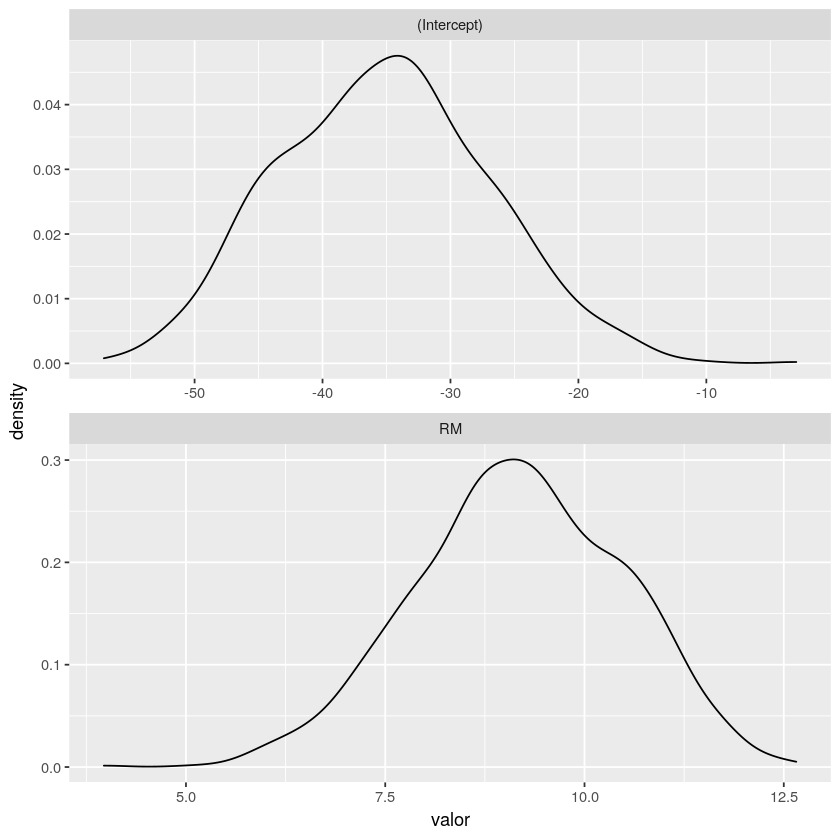

In [77]:
coeficientes <- list() #vamos a guardar aquí los coeficientes de una regresión

for(i in 1:1000){
  muestra <- sample_n(boston_housing_xlsx, 100)
  lm(MEDV ~ RM, data = muestra) -> modelo
  coeficientes[[i]] <- coefficients(modelo)
}

coeficientes %>% 
  transpose %>% 
  lapply(unlist) %>% 
  as_tibble() %>% 
  gather(key = coeficiente, value = valor) %>% 
  ggplot +
  aes(x = valor) + 
  geom_density() +
  facet_wrap(~coeficiente, nrow = 2,  scales = "free")

### while

Sirve para crear tareas repetitivas que no sabemos después de cuántos pasos terminan. Requiere una inicialización cuidadosa.

**Ejemplo:** [¿Cuántos sobres tengo que comprar para llenar un álbum de 100 cromos?](https://www.lanacion.com.ar/economia/peleados-con-los-algoritmos-los-economistas-y-su-talon-de-aquiles-nid2076973/)

In [78]:
album <- iteracion <- 0
aun_falta <- TRUE

while(aun_falta){
  iteracion <- iteracion + 1
  sobre <- sample(100, 6)
  album %>% c(sobre) %>% sort %>% unique -> album
  length(album) <= 100 -> aun_falta
  # show(album)
}

iteracion

[1] 90

### if, else

La estructura if sirve para ejecutar varias rutinas distintas dependiendo de una condición lógica. En caso de que sea necesario, es posible aplicar una rutina alterna con la estructura else.

**Ejemplo:** Normalidad Muchas veces al aplicar una prueba de hipótesis tenemos que establecer si los datos son normales, de esto depende el uso de una prueba paramétrica o no paramétrica.

In [79]:
# Extrae un vector de millas por galón
mtcars[["mpg"]]

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

In [80]:
# shapiro.test() comprueba si los datos son normales
# utilizar cuando se tienen menos de 2000 datos
mtcars[["mpg"]] %>% shapiro.test() -> prueba_sw

if(prueba_sw$p.value > 0.05){
    t.test(mpg ~ vs, data = mtcars)
} else {
  wilcox.test(mpg ~ vs, data = mtcars)
}


	Welch Two Sample t-test

data:  mpg by vs
t = -4.6671, df = 22.716, p-value = 0.0001098
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.462508  -4.418445
sample estimates:
mean in group 0 mean in group 1 
       16.61667        24.55714 
